<a href="https://colab.research.google.com/github/Anavi07/AudioSpotting/blob/main/Bangla_MFCC_All_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import cv2
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [7]:
# Paths
main_dir = '/content/Bangla-Number-Recognition-CNN'  # Path to FSDD
files_path = '/content/drive/MyDrive/bangla'  # Save processed data

if not os.path.exists(files_path):
    os.makedirs(files_path)

# Clone the dataset if not already cloned
if not os.path.exists(main_dir):
    !git clone https://github.com/ClockWorkKid/Bangla-Number-Recognition-CNN



In [4]:
# PROCESSING
# Feature extraction methods

# def CalculateZeroCrossingRate(file_location):
#     y, sr = librosa.load(file_location)
#     zCross = librosa.feature.zero_crossing_rate(y=y)
#     dim = (32, 32)
#     resized = cv2.resize(zCross, dim, interpolation = cv2.INTER_AREA)
#     return resized

def CalculateMelSpectrogram(file_location):
    y, sr = librosa.load(file_location)
    melSpec = librosa.feature.melspectrogram(y=y, sr=sr)
    melSpec_dB = librosa.power_to_db(melSpec)
    dim = (32, 32)
    resized = cv2.resize(melSpec_dB, dim, interpolation = cv2.INTER_AREA)
    return resized


def CalculateMFCC(file_location):
    y, sr = librosa.load(file_location)
    melSpec = librosa.feature.mfcc(y=y, sr=sr)
    dim = (32, 32)
    resized = cv2.resize(melSpec, dim, interpolation = cv2.INTER_AREA)
    return resized



In [5]:
cd /content

/content


In [6]:
'''for i in range(10):
  j = '/content/dataset'
  print(os.listdir(j))
  for k in os.listdir(j):
    print(k)
    if ".DS_" in k:
      continue

    for t in os.listdir(j+"/"+k):
      #print("path = ", os.listdir(j+"/"+k))
      if ".DS_" in k:
        continue
      print(t.split("WA")[1].split(".")[0])
      #print(t.split("D")[1][0])
      break
    break
  break '''

'for i in range(10):\n  j = \'/content/dataset\'\n  print(os.listdir(j))\n  for k in os.listdir(j):\n    print(k)\n    if ".DS_" in k:\n      continue\n\n    for t in os.listdir(j+"/"+k):\n      #print("path = ", os.listdir(j+"/"+k))\n      if ".DS_" in k:\n        continue\n      print(t.split("WA")[1].split(".")[0])\n      #print(t.split("D")[1][0])\n      break\n    break\n  break '

In [21]:
# import os
# import numpy as np

# # Paths
# main_dir = '/content/Bangla-Number-Recognition-CNN'  # Path to the main dataset folder
# recordings_dir = os.path.join(main_dir, 'Dataset/Dataset_sorted')  # Path to the Dataset_sorted folder
# files_path = '/content/drive/MyDrive/bangla'  # Save processed data

# # Ensure output directory exists
# if not os.path.exists(files_path):
#     os.makedirs(files_path)

# # Processing
# x = []
# y = []

# # Loop through each label directory (0, 1, ..., 9, noise)
# for label_dir in os.listdir(recordings_dir):
#     label_path = os.path.join(recordings_dir, label_dir)

#     # Skip "noise" directory
#     if label_dir.lower() == "noise" or not os.path.isdir(label_path):
#         continue

#     # Process files within the label directory
#     for file_name in os.listdir(label_path):
#         if not file_name.endswith('.wav'):  # Skip non-wav files
#             continue

#         file_path = os.path.join(label_path, file_name)

#         try:
#             # Extract Mel Spectrogram features
#             x.append(CalculateMelSpectrogram(file_path))

#             # Use directory name as label (e.g., '0', '1', ..., '9')
#             label = int(label_dir)  # Assumes all other directory names are valid digits
#             y.append(label)
#         except Exception as e:
#             print(f"Error processing {file_name}: {e}")

# # Convert to NumPy arrays
# x = np.array(x)
# y = np.array(y)

# # Verify data
# if x.size == 0 or y.size == 0:
#     raise ValueError("No data was processed. Check dataset structure and feature extraction.")

# # Save processed data
# np.save(os.path.join(files_path, "X_melspectrogram.npy"), x)
# np.save(os.path.join(files_path, "Y_melspectrogram.npy"), y)

# print(f"Processing completed. Processed data saved in {files_path}.")


Processing completed. Processed data saved in /content/drive/MyDrive/bangla.


In [68]:
import os
import numpy as np

# Paths
main_dir = '/content/Bangla-Number-Recognition-CNN'  # Path to the main dataset folder
recordings_dir = os.path.join(main_dir, 'Dataset/Dataset_sorted')  # Path to the Dataset_sorted folder
files_path = '/content/drive/MyDrive/bangla'  # Save processed data

# Ensure output directory exists
if not os.path.exists(files_path):
    os.makedirs(files_path)

# Processing
x = []
y = []

# Loop through each label directory (0, 1, ..., 9, noise)
for label_dir in os.listdir(recordings_dir):
    label_path = os.path.join(recordings_dir, label_dir)

    # Skip "noise" directory
    if label_dir.lower() == "noise" or not os.path.isdir(label_path):
        continue

    # Process files within the label directory
    for file_name in os.listdir(label_path):
        if not file_name.endswith('.wav'):  # Skip non-wav files
            continue

        file_path = os.path.join(label_path, file_name)

        try:
            # Extract Mel Spectrogram features
            x.append(CalculateMFCC(file_path))

            # Use directory name as label (e.g., '0', '1', ..., '9')
            label = int(label_dir)  # Assumes all other directory names are valid digits
            y.append(label)
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

# Convert to NumPy arrays
x = np.array(x)
y = np.array(y)

# Verify data
if x.size == 0 or y.size == 0:
    raise ValueError("No data was processed. Check dataset structure and feature extraction.")

# Save processed data
np.save(os.path.join(files_path, "X_mfcc.npy"), x)
np.save(os.path.join(files_path, "Y_mfcc.npy"), y)

print(f"Processing completed. Processed data saved in {files_path}.")


Processing completed. Processed data saved in /content/drive/MyDrive/bangla.


In [69]:
#load files
files_path = '/content/drive/MyDrive/bangla'  # Save processed data

# x_melspectrogram = np.load(files_path+"/X_melspectrogram.npy", allow_pickle=True)
# x_zero_crossing_rate = np.load(files_path+"/X_zero_crossing_rate.npy", allow_pickle=True)
x_mfcc = np.load(files_path+"/X_mfcc.npy", allow_pickle=True)
# y_melspectrogram = np.load(files_path+"/Y_melspectrogram.npy", allow_pickle=True)
# y_zero_crossing_rate = np.load(files_path+"/y_zero_crossing_rate.npy", allow_pickle=True)
y_mfcc = np.load(files_path+"/Y_mfcc.npy", allow_pickle=True)

In [70]:
#Split data into train and test

from sklearn.model_selection import train_test_split
x = x_mfcc
y = y_mfcc

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
np.save(files_path+"/x_mfcc_train",x_train)
np.save(files_path+"/y_mfcc_train",y_train)
np.save(files_path+"/x_mfcc_test",x_test)
np.save(files_path+"/y_mfcc_test",y_test)

In [23]:
# from sklearn.model_selection import train_test_split
# x = x_melspectrogram
# y = y_melspectrogram

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
# np.save(files_path+"/x_melspectrogram_train",x_train)
# np.save(files_path+"/y_melspectrogram_train",y_train)
# np.save(files_path+"/x_melspectrogram_test",x_test)
# np.save(files_path+"/y_melspectrogram_test",y_test)

In [ ]:

# from sklearn.model_selection import train_test_split
# x = x_zero_crossing_rate
# y = y_zero_crossing_rate

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
# np.save(files_path+"/x_zero_crossing_rate_train",x_train)
# np.save(files_path+"/y_zero_crossing_rate_train",y_train)
# np.save(files_path+"/x_zero_crossing_rate_test",x_test)
# np.save(files_path+"/y_zero_crossing_rate_test",y_test)

In [72]:
import tensorflow as tf
import numpy as np

files_path = '/content/drive/MyDrive/bangla'

features = ['melspectrogram', 'mfcc', 'zero_crossing_rate']

x_train = np.load(files_path+"/x_{}_train.npy".format(features[1]), allow_pickle=True)
y_train = np.load(files_path+"/y_{}_train.npy".format(features[1]), allow_pickle=True)

x_test = np.load(files_path+"/x_{}_test.npy".format(features[1]),allow_pickle=True)
y_test = np.load(files_path+"/y_{}_test.npy".format(features[1]),allow_pickle=True)

In [73]:
print(np.unique(y_melspectrogram))

[0 1 2 3 4 5 6 7 8 9]


In [74]:
x_train =x_train.reshape((x_train.shape[0],32,32,1))
x_test =x_test.reshape((x_test.shape[0],32,32,1))

## CNN

In [75]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
def GetCNN():
  model = models.Sequential()

  model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Dropout(0.1))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))# fully connected
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.1))

  model.add(layers.Dense(10,activation='softmax', use_bias=True))
  return model

In [76]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
train_y = label_as_binary.fit_transform(y_train)
test_y = label_as_binary.fit_transform(y_test)

In [77]:
# Normalise
x_train = x_train / 255.0
x_test = x_test / 255.0

In [78]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# Ensure consistency by fitting the LabelBinarizer only once on all possible labels
label_as_binary = LabelBinarizer()
label_as_binary.fit(np.unique(y_melspectrogram))  # Fit on all unique labels (0–9)

# Transform train and test labels
train_y = label_as_binary.transform(y_train)
test_y = label_as_binary.transform(y_test)

# Verify shapes
print("X train shape = ", x_train.shape)
print("y train shape = ", train_y.shape)
print("X test shape = ", x_test.shape)
print("y test shape = ", test_y.shape)

# CNN Model
cnn_model = GetCNN()
print(cnn_model.summary())

cnn_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, clipnorm=1.0),
)

# Define save path for the best model
save_path = '/content/drive/MyDrive/saved files/bangla/models'
callbacks = ModelCheckpoint(
    save_path + "/mfcc_model_.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the model
history = cnn_model.fit(
    x_train, train_y,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_split=0.1,
    callbacks=[callbacks]
)

# Evaluate the model
print("Test Accuracy is ", cnn_model.evaluate(x_test, test_y)[1])


X train shape =  (1801, 32, 32, 1)
y train shape =  (1801, 10)
X test shape =  (451, 32, 32, 1)
y test shape =  (451, 10)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)                   │ (None, 30, 30, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,242 (684.54 KB)

 Trainable params: 174,858 (683.04 KB)

 Non-trainable params: 384 (1.50 KB)

None
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.4895 - loss: 1.6200
Epoch 1: val_accuracy improved from -inf to 0.25414, saving model to /content/drive/MyDrive/saved files/bangla/models/mfcc_model_.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.4962 - loss: 1.5972 - val_accuracy: 0.2541 - val_loss: 2.8120
Epoch 2/50
21/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8563 - loss: 0.3629
Epoch 2: val_accuracy did not improve from 0.25414
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8599 - loss: 0.3563 - val_accuracy: 0.1823 - val_loss: 5.2436
Epoch 3/50
21/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9158 - loss: 0.2706
Epoch 3: val_accuracy improved from 0.25414 to 0.36464, saving model to /content/drive/MyDrive/saved files/bangla/models/mfcc_model_.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9164 - loss: 0.2680 - val_accuracy: 0.3646 - val_loss: 2.8970
Epoch 4/50
18/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.913

In [79]:
# Load the saved model
cnn_model = tf.keras.models.load_model(save_path + "/mfcc_model_.keras")

# Evaluate on the training set
train_metrics = cnn_model.evaluate(x_train, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = cnn_model.evaluate(x_test, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val = x_train[-int(0.1 * len(x_train)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = cnn_model.evaluate(x_val, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9915 - loss: 0.0246
Train Loss: 0.029325837269425392, Train Accuracy: 0.9916712641716003
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9805 - loss: 0.0905
Test Loss: 0.08582179993391037, Test Accuracy: 0.9756097793579102
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9831 - loss: 0.1798
Validation Loss: 0.09991558641195297, Validation Accuracy: 0.9888888597488403


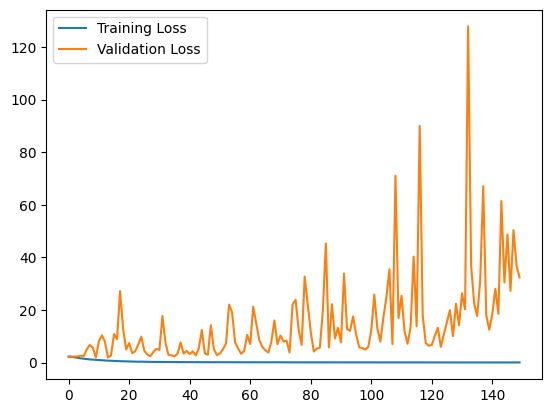

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.show()


In [ ]:
# import keras
# zcr_model = keras.models.load_model(save_path+"/{}_model_.keras".format(features[0]))
# print("Test Accuracy is ", cnn_model.evaluate(x_test,test_y)[1])

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0745 - loss: 33.0289
Test Accuracy is  0.08357183635234833


## GoogleNet

In [80]:
import tensorflow as tf
from tensorflow.keras import layers, models

def GetGoogleNet():
    input_layer = layers.Input(shape=(32, 32, 1))

    # First Convolutional Block
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)

    # Inception Module 1
    branch1 = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)

    branch2 = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)
    branch2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(branch2)

    branch3 = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)
    branch3 = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(branch3)

    branch4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch4 = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(branch4)

    x = layers.Concatenate()([branch1, branch2, branch3, branch4])
    x = layers.BatchNormalization()(x)

    # Inception Module 2
    branch1 = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(x)

    branch2 = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(x)
    branch2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(branch2)

    branch3 = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(x)
    branch3 = layers.Conv2D(128, (5, 5), activation='relu', padding='same')(branch3)

    branch4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch4 = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(branch4)

    x = layers.Concatenate()([branch1, branch2, branch3, branch4])
    x = layers.BatchNormalization()(x)

    # Global Average Pooling + Fully Connected Layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    output_layer = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model


In [81]:
# Model Compilation and Training
save_path = '/content/drive/MyDrive/saved files/bangla/models'

cnn_model = GetGoogleNet()
print(cnn_model.summary())

cnn_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, clipnorm=1.0),
)

from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = ModelCheckpoint(
    save_path + "/googleNet_mfcc_model.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

print("X train shape = ", x_train.shape)
print("y train shape = ", train_y.shape)

history = cnn_model.fit(
    x_train, train_y,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_split=0.1,
    callbacks=[callbacks]
)

Model: "functional_169"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 32, 32, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_55 (Conv2D)        │ (None, 32, 32, 64)     │            640 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_23          │ (None, 16, 16, 64)     │              0 │ conv2d_55[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_21    │ (None, 16, 16, 64)     │            256 │ max_pooling2d_23[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_57 (Conv2D)        │ (None, 16, 16, 32)     │          2,080 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_59 (Conv2D)        │ (None, 16, 16, 32)     │          2,080 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_24          │ (None, 16, 16, 64)     │              0 │ batch_normalization_2… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_56 (Conv2D)        │ (None, 16, 16, 32)     │          2,080 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_58 (Conv2D)        │ (None, 16, 16, 64)     │         18,496 │ conv2d_57[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_60 (Conv2D)        │ (None, 16, 16, 64)     │         51,264 │ conv2d_59[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_61 (Conv2D)        │ (None, 16, 16, 32)     │          2,080 │ max_pooling2d_24[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 16, 16, 192)    │              0 │ conv2d_56[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_58[0][0],       │
│                           │                        │                │ conv2d_60[0][0],       │
│                           │                        │                │ conv2d_61[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_22    │ (None, 16, 16, 192)    │            768 │ concatenate_4[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_63 (Conv2D)        │ (None, 16, 16, 64)     │         12,352 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_65 (Conv2D)        │ (None, 16, 16, 64)     │         12,352 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_25     

 Total params: 542,218 (2.07 MB)

 Trainable params: 540,938 (2.06 MB)

 Non-trainable params: 1,280 (5.00 KB)

None
X train shape =  (1801, 32, 32, 1)
y train shape =  (1801, 10)
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.2802 - loss: 1.9519
Epoch 1: val_accuracy improved from -inf to 0.13812, saving model to /content/drive/MyDrive/saved files/bangla/models/googleNet_mfcc_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 389ms/step - accuracy: 0.2846 - loss: 1.9403 - val_accuracy: 0.1381 - val_loss: 3.2197
Epoch 2/50
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6368 - loss: 0.9971
Epoch 2: val_accuracy did not improve from 0.13812
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6393 - loss: 0.9902 - val_accuracy: 0.0994 - val_loss: 6.8148
Epoch 3/50
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7545 - loss: 0.6316
Epoch 3: val_accuracy did not improve from 0.13812
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7577 - loss: 0.6255 - val_accuracy: 0.1271 - val_loss: 53.0744
Epoch 4/50
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8243 - loss: 

In [82]:
# Reshape the train and test data back to (32, 32, 1)
x_train_reshaped = tf.image.resize(x_train, (32, 32))  # Resize to match original input
x_test_reshaped = tf.image.resize(x_test, (32, 32))    # Resize to match original input

# Add grayscale channel
x_train_reshaped = tf.expand_dims(x_train_reshaped, axis=-1)
x_test_reshaped = tf.expand_dims(x_test_reshaped, axis=-1)

In [83]:
# Load the saved model
googleNet_model = tf.keras.models.load_model(save_path + "/googleNet_mfcc_model.keras")

# Evaluate on the training set
train_metrics = googleNet_model.evaluate(x_train_reshaped, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = googleNet_model.evaluate(x_test_reshaped, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val_reshaped = x_train_reshaped[-int(0.1 * len(x_train_reshaped)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = googleNet_model.evaluate(x_val_reshaped, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9961 - loss: 0.0178
Train Loss: 0.021400710567831993, Train Accuracy: 0.9944475293159485
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9759 - loss: 0.1427
Test Loss: 0.1160573735833168, Test Accuracy: 0.9711751937866211
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9737 - loss: 0.0655
Validation Loss: 0.06583834439516068, Validation Accuracy: 0.9777777791023254


## LeNet

In [84]:
def GetLeNet():
    model = models.Sequential()

    # Layer 1
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1), padding='same'))
    model.add(layers.AveragePooling2D((2, 2)))

    # Layer 2
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D((2, 2)))

    # Flatten and Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes

    return model


In [85]:
save_path = '/content/drive/MyDrive/saved files/bangla/models'

# Instantiate the model
lenet_model = GetLeNet()

# Compile the model
lenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
print(lenet_model.summary())

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = ModelCheckpoint(save_path + "/lenet_mfcc_model.keras", monitor='val_accuracy',
                            mode='max', save_best_only=True, verbose=1)

# Train the AlexNet model
history = lenet_model.fit(
    x_train, train_y,
    validation_split=0.1,
    batch_size=64,
    epochs=50,
    callbacks=[callbacks],
    verbose=1
)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)                   │ (None, 32, 32, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 16, 16, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 6, 6, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,826 (323.54 KB)

 Trainable params: 82,826 (323.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.1849 - loss: 2.2802
Epoch 1: val_accuracy improved from -inf to 0.43646, saving model to /content/drive/MyDrive/saved files/bangla/models/lenet_mfcc_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 288ms/step - accuracy: 0.1858 - loss: 2.2789 - val_accuracy: 0.4365 - val_loss: 2.0858
Epoch 2/50
21/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3921 - loss: 1.9300
Epoch 2: val_accuracy improved from 0.43646 to 0.46961, saving model to /content/drive/MyDrive/saved files/bangla/models/lenet_mfcc_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3959 - loss: 1.8848 - val_accuracy: 0.4696 - val_loss: 1.3990
Epoch 3/50
22/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5135 - loss: 1.2626 
Epoch 3: val_accuracy improved from 0.46961 to 0.58011, saving model to /content/drive/MyDrive/saved files/bangla/models/lenet_mfcc_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5239 - loss: 1.2456 - val_

In [86]:
# Load the saved model
leNet_model = tf.keras.models.load_model(save_path + "/lenet_mfcc_model.keras")

# Evaluate on the training set
train_metrics = leNet_model.evaluate(x_train_reshaped, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = leNet_model.evaluate(x_test_reshaped, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val_reshaped = x_train_reshaped[-int(0.1 * len(x_train_reshaped)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = leNet_model.evaluate(x_val_reshaped, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9936 - loss: 0.0201
Train Loss: 0.03497558832168579, Train Accuracy: 0.9900055527687073
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9376 - loss: 0.2022
Test Loss: 0.18578487634658813, Test Accuracy: 0.9445676207542419
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9487 - loss: 0.1781
Validation Loss: 0.16872788965702057, Validation Accuracy: 0.9555555582046509


## MobileNetV2

In [87]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Preprocess the data to match MobileNet input requirements
import numpy as np
x_train_3ch = np.repeat(x_train, 3, axis=-1)  # Convert (32, 32, 1) to (32, 32, 3)
x_test_3ch = np.repeat(x_test, 3, axis=-1)

# Define the MobileNet model
def GetMobileNet():
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None  # Training from scratch for audio classification
    )

    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')  # Adjust for 10-class classification
    ])

    return model


In [88]:
save_path = '/content/drive/MyDrive/saved files/bangla/models'

# Instantiate the model
mobileNet_model = GetMobileNet()

# Compile the model
mobileNet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
print(mobileNet_model.summary())

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = ModelCheckpoint(
    save_path + "/mobileNet_mfcc_model.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the MobileNet model
history = mobileNet_model.fit(
    x_train_3ch, train_y,
    validation_split=0.1,
    batch_size=64,
    epochs=50,
    callbacks=[callbacks],
    verbose=1
)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_32 (Functional)     │ (None, 1, 1, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 2,389,130 (9.11 MB)

 Non-trainable params: 34,112 (133.25 KB)

None
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.1303 - loss: 2.5310
Epoch 1: val_accuracy improved from -inf to 0.12155, saving model to /content/drive/MyDrive/saved files/bangla/models/mobileNet_mfcc_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 61s 727ms/step - accuracy: 0.1313 - loss: 2.5251 - val_accuracy: 0.1215 - val_loss: 2.3021
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2999 - loss: 1.9720
Epoch 2: val_accuracy did not improve from 0.12155
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3004 - loss: 1.9712 - val_accuracy: 0.1215 - val_loss: 2.3016
Epoch 3/50
24/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4753 - loss: 1.5156
Epoch 3: val_accuracy did not improve from 0.12155
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4803 - loss: 1.5041 - val_accuracy: 0.1215 - val_loss: 2.3014
Epoch 4/50
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6426 - loss: 1.0580
Epoch 4: val_accuracy did not improve from 0.12155
26/26 

In [89]:
# Load the saved model
mobileNet_model = tf.keras.models.load_model(save_path + "/mobileNet_mfcc_model.keras")

# Evaluate on the training set
train_metrics = mobileNet_model.evaluate(x_train_3ch, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = mobileNet_model.evaluate(x_test_3ch, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val_reshaped = x_train_3ch[-int(0.1 * len(x_train_3ch)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = mobileNet_model.evaluate(x_val_reshaped, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")


57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.1227 - loss: 2.3107
Train Loss: 2.3070194721221924, Train Accuracy: 0.12715157866477966
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.1126 - loss: 2.3005
Test Loss: 2.305736541748047, Test Accuracy: 0.11308203637599945
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.1219 - loss: 2.3086
Validation Loss: 2.301424980163574, Validation Accuracy: 0.12777778506278992


## EfficientNetB0

In [90]:
def GetEfficientNet():
    base_model = tf.keras.applications.EfficientNetB0(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None
    )

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    return model

In [91]:
save_path = '/content/drive/MyDrive/saved files/bangla/models'

efficientnet_model = GetEfficientNet()

# Compile the model
efficientnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
print(efficientnet_model.summary())

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = ModelCheckpoint(save_path + "/efficientnet_mfcc_model.keras", monitor='val_accuracy',
                            mode='max', save_best_only=True, verbose=1)

# Train the AlexNet model
history = efficientnet_model.fit(
    x_train, train_y,
    validation_split=0.1,
    batch_size=64,
    epochs=50,
    callbacks=[callbacks],
    verbose=1
)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 1, 1, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,214,829 (16.08 MB)

 Trainable params: 4,172,806 (15.92 MB)

 Non-trainable params: 42,023 (164.16 KB)

None
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1443 - loss: 2.5939  
Epoch 1: val_accuracy improved from -inf to 0.11050, saving model to /content/drive/MyDrive/saved files/bangla/models/efficientnet_mfcc_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.1459 - loss: 2.5881 - val_accuracy: 0.1105 - val_loss: 2.3022
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3211 - loss: 1.8835
Epoch 2: val_accuracy improved from 0.11050 to 0.12155, saving model to /content/drive/MyDrive/saved files/bangla/models/efficientnet_mfcc_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.3220 - loss: 1.8812 - val_accuracy: 0.1215 - val_loss: 2.3243
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5000 - loss: 1.4204
Epoch 3: val_accuracy did not improve from 0.12155
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5012 - loss: 1.4177 - val_accuracy: 0.1105 - val_loss: 2.3314
Epoch 4/50
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [92]:
# Load the saved model
efficientnet_model = tf.keras.models.load_model(save_path + "/efficientnet_mfcc_model.keras")

# Evaluate on the training set
train_metrics = efficientnet_model.evaluate(x_train, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = efficientnet_model.evaluate(x_test, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val = x_train[-int(0.1 * len(x_train)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = efficientnet_model.evaluate(x_val, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.9934 - loss: 0.0235
Train Loss: 0.02685471624135971, Train Accuracy: 0.9927817583084106
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.9633 - loss: 0.1285
Test Loss: 0.1511143147945404, Test Accuracy: 0.9534367918968201
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 601ms/step - accuracy: 0.9714 - loss: 0.1103
Validation Loss: 0.12287388741970062, Validation Accuracy: 0.9666666388511658


## AlexNet

In [93]:
import tensorflow as tf
from tensorflow.keras import layers, models

def GetAlexNet():
    model = models.Sequential([
        # First Convolutional Layer
        layers.Conv2D(96, (3, 3), strides=1, activation='relu', input_shape=(32, 32, 3), padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.BatchNormalization(),

        # Second Convolutional Layer
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.BatchNormalization(),

        # Third, Fourth, Fifth Convolutional Layers
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.BatchNormalization(),

        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        # Output Layer
        layers.Dense(10, activation='softmax')  # Adjust for 10-class classification
    ])

    return model

In [94]:
save_path = '/content/drive/MyDrive/saved files/bangla/models'

# Preprocess the data to match AlexNet input requirements
x_train_3ch = np.repeat(x_train, 3, axis=-1)  # Convert (32, 32, 1) to (32, 32, 3)
x_test_3ch = np.repeat(x_test, 3, axis=-1)

# Instantiate the AlexNet model
alexnet_model = GetAlexNet()

# Compile the model
alexnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
print(alexnet_model.summary())

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = ModelCheckpoint(
    save_path + "/alexNet_mfcc_model.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the AlexNet model
history = alexnet_model.fit(
    x_train_3ch, train_y,
    validation_split=0.1,
    batch_size=64,
    epochs=50,
    callbacks=[callbacks],
    verbose=1
)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_70 (Conv2D)                   │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 16, 16, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 16, 16, 256)         │         221,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 8, 8, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 8, 8, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 8, 8, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,927,754 (140.87 MB)

 Trainable params: 36,926,538 (140.86 MB)

 Non-trainable params: 1,216 (4.75 KB)

None
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.1076 - loss: 7.7482
Epoch 1: val_accuracy improved from -inf to 0.09392, saving model to /content/drive/MyDrive/saved files/bangla/models/alexNet_mfcc_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 362ms/step - accuracy: 0.1084 - loss: 7.6456 - val_accuracy: 0.0939 - val_loss: 62.0649
Epoch 2/50
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2355 - loss: 2.0324
Epoch 2: val_accuracy did not improve from 0.09392
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2403 - loss: 2.0208 - val_accuracy: 0.0939 - val_loss: 44.7790
Epoch 3/50
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4824 - loss: 1.3883
Epoch 3: val_accuracy did not improve from 0.09392
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4851 - loss: 1.3795 - val_accuracy: 0.0939 - val_loss: 23.5330
Epoch 4/50
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7001 - loss: 0.8180
Epoch 4: val_accuracy did not improve from 0.09392
26/26

In [95]:
# Load the saved model
alexNet_model = tf.keras.models.load_model(save_path + "/alexNet_mfcc_model.keras")

# Evaluate on the training set
train_metrics = alexNet_model.evaluate(x_train_3ch, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = alexNet_model.evaluate(x_test_3ch, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val_reshaped = x_train_3ch[-int(0.1 * len(x_train_3ch)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = alexNet_model.evaluate(x_val_reshaped, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")


57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9887 - loss: 0.0325
Train Loss: 0.04217063635587692, Train Accuracy: 0.9855635762214661
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9717 - loss: 0.2234
Test Loss: 0.15424974262714386, Test Accuracy: 0.9600886702537537
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9809 - loss: 0.0673
Validation Loss: 0.03582730516791344, Validation Accuracy: 0.9888888597488403


## SqueezeNet

In [96]:
import tensorflow as tf
from tensorflow.keras import layers, models

def GetSqueezeNet():
    model = models.Sequential([
        layers.Conv2D(96, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),

        layers.Conv2D(10, (1, 1), activation='softmax'),  # Adjust for 10-class classification
        layers.GlobalAveragePooling2D()  # Global pooling to reduce dimensions
    ])

    return model

In [97]:
save_path = '/content/drive/MyDrive/saved files/bangla/models'

# Preprocess the data to match SqueezeNet input requirements
x_train_3ch = np.repeat(x_train, 3, axis=-1)  # Convert (32, 32, 1) to (32, 32, 3)
x_test_3ch = np.repeat(x_test, 3, axis=-1)

# Instantiate the SqueezeNet model
squeezenet_model = GetSqueezeNet()

# Compile the model
squeezenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
print(squeezenet_model.summary())

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = ModelCheckpoint(
    save_path + "/squeezeNet_mfcc_model.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the SqueezeNet model
history = squeezenet_model.fit(
    x_train_3ch, train_y,
    validation_split=0.1,
    batch_size=64,
    epochs=50,
    callbacks=[callbacks],
    verbose=1
)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_75 (Conv2D)                   │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_76 (Conv2D)                   │ (None, 16, 16, 128)         │         110,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 8, 8, 10)            │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_9           │ (None, 10)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,148,810 (4.38 MB)

 Trainable params: 1,148,810 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1074 - loss: 2.3051
Epoch 1: val_accuracy improved from -inf to 0.15470, saving model to /content/drive/MyDrive/saved files/bangla/models/squeezeNet_mfcc_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.1079 - loss: 2.3050 - val_accuracy: 0.1547 - val_loss: 2.2949
Epoch 2/50
23/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1620 - loss: 2.2722
Epoch 2: val_accuracy improved from 0.15470 to 0.33149, saving model to /content/drive/MyDrive/saved files/bangla/models/squeezeNet_mfcc_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1660 - loss: 2.2648 - val_accuracy: 0.3315 - val_loss: 2.0553
Epoch 3/50
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3058 - loss: 1.9524
Epoch 3: val_accuracy improved from 0.33149 to 0.44199, saving model to /content/drive/MyDrive/saved files/bangla/models/squeezeNet_mfcc_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3104 - lo

In [98]:
# Load the saved model
squeezeNet_model = tf.keras.models.load_model(save_path + "/squeezeNet_mfcc_model.keras")

# Evaluate on the training set
train_metrics = squeezeNet_model.evaluate(x_train_3ch, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = squeezeNet_model.evaluate(x_test_3ch, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val_reshaped = x_train_3ch[-int(0.1 * len(x_train_3ch)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = squeezeNet_model.evaluate(x_val_reshaped, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0644
Train Loss: 0.07278522104024887, Train Accuracy: 1.0
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9876 - loss: 0.1770
Test Loss: 0.18517626821994781, Test Accuracy: 0.9866962432861328
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 1.0000 - loss: 0.1735
Validation Loss: 0.16138607263565063, Validation Accuracy: 1.0


## ResNet50

In [65]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.applications import ResNet50  # Import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint

# Resize and convert the data from grayscale to RGB
x_train_resized = tf.image.resize(x_train, (224, 224))  # Resize to 224x224
x_train_rgb = tf.image.grayscale_to_rgb(x_train_resized)  # Convert to 3 channels

x_test_resized = tf.image.resize(x_test, (224, 224))
x_test_rgb = tf.image.grayscale_to_rgb(x_test_resized)  # Convert to 3 channels

# Verify the shapes of the transformed data
print(f"x_train_rgb shape: {x_train_rgb.shape}")
print(f"x_test_rgb shape: {x_test_rgb.shape}")


x_train_rgb shape: (1801, 224, 224, 3)
x_test_rgb shape: (451, 224, 224, 3)


In [66]:
# Function to create a ResNet50 model for audio digit classification
def GetResNet50():
    # Load the ResNet50 architecture without the top classification layer
    base_model = ResNet50(
        include_top=False,
        weights=None,  # No pretrained weights since this is specific to audio digits
        input_shape=(224, 224, 3)  # Adjusted input shape for ResNet50
    )

    # Add custom classification layers on top of ResNet50
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='relu'))  # Fully connected layer
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes for digit classification

    return model

In [67]:
save_path = '/content/drive/MyDrive/saved files/bangla/models'

# Create the ResNet50 model
resnet_model = GetResNet50()
print(resnet_model.summary())

# Compile the model
resnet_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
)

# Define the model checkpoint callback
callbacks = ModelCheckpoint(
    save_path + "/resnet50_ms_model.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Print shapes of input and output
print("X train shape = ", x_train_rgb.shape)
print("y train shape = ", train_y.shape)

# Train the model
history = resnet_model.fit(
    x_train_rgb, train_y,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_split=0.1,
    callbacks=[callbacks]
)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,146,442 (92.11 MB)

 Trainable params: 24,093,322 (91.91 MB)

 Non-trainable params: 53,120 (207.50 KB)

None
X train shape =  (1801, 224, 224, 3)
y train shape =  (1801, 10)
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1411 - loss: 2.9331   
Epoch 1: val_accuracy improved from -inf to 0.12707, saving model to /content/drive/MyDrive/saved files/bangla/models/resnet50_ms_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.1417 - loss: 2.9215 - val_accuracy: 0.1271 - val_loss: 2.3338
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.1786 - loss: 2.2197
Epoch 2: val_accuracy did not improve from 0.12707
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 639ms/step - accuracy: 0.1794 - loss: 2.2177 - val_accuracy: 0.0939 - val_loss: 2.8473
Epoch 3/50


KeyboardInterrupt: 

In [ ]:
# Load the saved model
resnet_model = tf.keras.models.load_model(save_path + "/resnet50_ms_model.keras")

# Evaluate on the training set
train_metrics = resnet_model.evaluate(x_train_rgb, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = resnet_model.evaluate(x_test_rgb, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val = x_train[-int(0.1 * len(x_train)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = resnet_model.evaluate(x_val, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")

In [ ]:
# Load all models
import keras

mp_model = keras.models.load_model(save_path+"/melspectrogram_model_.keras")
mfcc_model = keras.models.load_model(save_path+"/mfcc_model_.keras")
zc_model = keras.models.load_model(save_path+"/zero_crossing_rate_model_.keras")

In [ ]:
# Model Ensembling
from keras.models import Model
from keras import layers

def ensembleModels(models, model_input):
    # collect outputs of models in a list
    model_outputs=[model(model_input) for model in models]
    # averaging outputs
    ensemble_output=layers.average(model_outputs)
    # build model from same input and avg output
    modelEns = Model(inputs=model_input, outputs=ensemble_output,    name='ensemble')

    return modelEns

In [ ]:
from keras.layers import Input  # Correct import for Input
from keras.models import Model  # Ensure you have this for model creation

# Assuming ensembleModels is defined elsewhere
models = [mp_model, mfcc_model, zc_model]

model_input = Input(shape=models[0].input_shape[1:])  # c*h*w
modelEns = ensembleModels(models, model_input)  # Assuming this function is implemented
modelEns.summary()

modelEns.save(save_path + "/ensemble_.keras", include_optimizer=True)

Model: "ensemble"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 32, 32, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_8 (Sequential) │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_9 (Sequential) │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_10             │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_5 (Average)       │ (None, 10)             │              0 │ sequential_8[5][0],    │
│                           │                        │                │ sequential_9[5][0],    │
│                           │                        │                │ sequential_10[5][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 525,726 (2.01 MB)

 Trainable params: 524,574 (2.00 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
from keras.models import load_model

# Load the model
model = load_model(save_path + "/ensemble_.keras")

# Compile the model (use the same loss and metrics as during training)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print the model summary
model.summary()

# Evaluate the model
test_accuracy = model.evaluate(x_test, test_y)[1]
print("Test Accuracy is ", test_accuracy)


Model: "ensemble"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 32, 32, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_8 (Sequential) │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_9 (Sequential) │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_10             │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_5 (Average)       │ (None, 10)             │              0 │ sequential_8[0][0],    │
│                           │                        │                │ sequential_9[0][0],    │
│                           │                        │                │ sequential_10[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 525,726 (2.01 MB)

 Trainable params: 524,574 (2.00 MB)

 Non-trainable params: 1,152 (4.50 KB)

ValueError: Cannot get result() since the metric has not yet been built.

In [ ]:
print("Metrics:", model.metrics_names)  # This should list the metrics


Metrics: ['loss', 'loss', 'compile_metrics', 'loss', 'compile_metrics', 'loss', 'compile_metrics', 'compile_metrics']


In [ ]:
from sklearn.preprocessing import LabelBinarizer

def evaluateAll(model, x_test, test_y):
  label_as_binary = LabelBinarizer()
  test_y = label_as_binary.fit_transform(test_y)
  return model.evaluate(x_test,test_y)



In [ ]:
#Test data
import keras

path = '/content/drive/MyDrive/processed_data/audd'

x_test = np.load(path+"/x_melspectrogram_test.npy",allow_pickle=True)
y_test = np.load(path+"/y_melspectrogram_test.npy",allow_pickle=True)


mp_model = keras.models.load_model(save_path+"/melspectrogram_model_.keras")

model_result = evaluateAll(mp_model, x_test, y_test)
print(model_result)
print("model history ", mp_model.history)

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1075 - loss: 2.2746
[2.26497220993042, 0.11619919538497925]
model history  <keras.src.callbacks.history.History object at 0x79556847a3b0>
